In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_in = "C:/Users/barre/Desktop/Machine Learning/projects/bank/in/{}"

In [3]:
bank = pd.read_csv(dir_in.format('data_processed.csv'))

In [4]:
bank.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,gender_F,gender_M,marital_Divorced,marital_Married,marital_Single,marital_Unknown,Target
0,768805383,45,3,2,3,1,39,5,1,12691.0,777,1144,42,0,1,0,1,0,0,1
1,818770008,49,5,4,1,1,44,6,1,8256.0,864,1291,33,1,0,0,0,1,0,1
2,713982108,51,3,4,4,1,36,4,1,3418.0,0,1887,20,0,1,0,1,0,0,1
3,769911858,40,4,2,1,1,34,3,4,3313.0,2517,1171,20,1,0,0,0,0,1,1
4,709106358,40,3,1,3,1,21,5,1,4716.0,0,816,28,0,1,0,1,0,0,1


In [5]:
bank['CLIENTNUM'] = bank['CLIENTNUM'].astype('object')

In [6]:
bank.dtypes

CLIENTNUM                    object
Customer_Age                  int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
gender_F                      int64
gender_M                      int64
marital_Divorced              int64
marital_Married               int64
marital_Single                int64
marital_Unknown               int64
Target                        int64
dtype: object

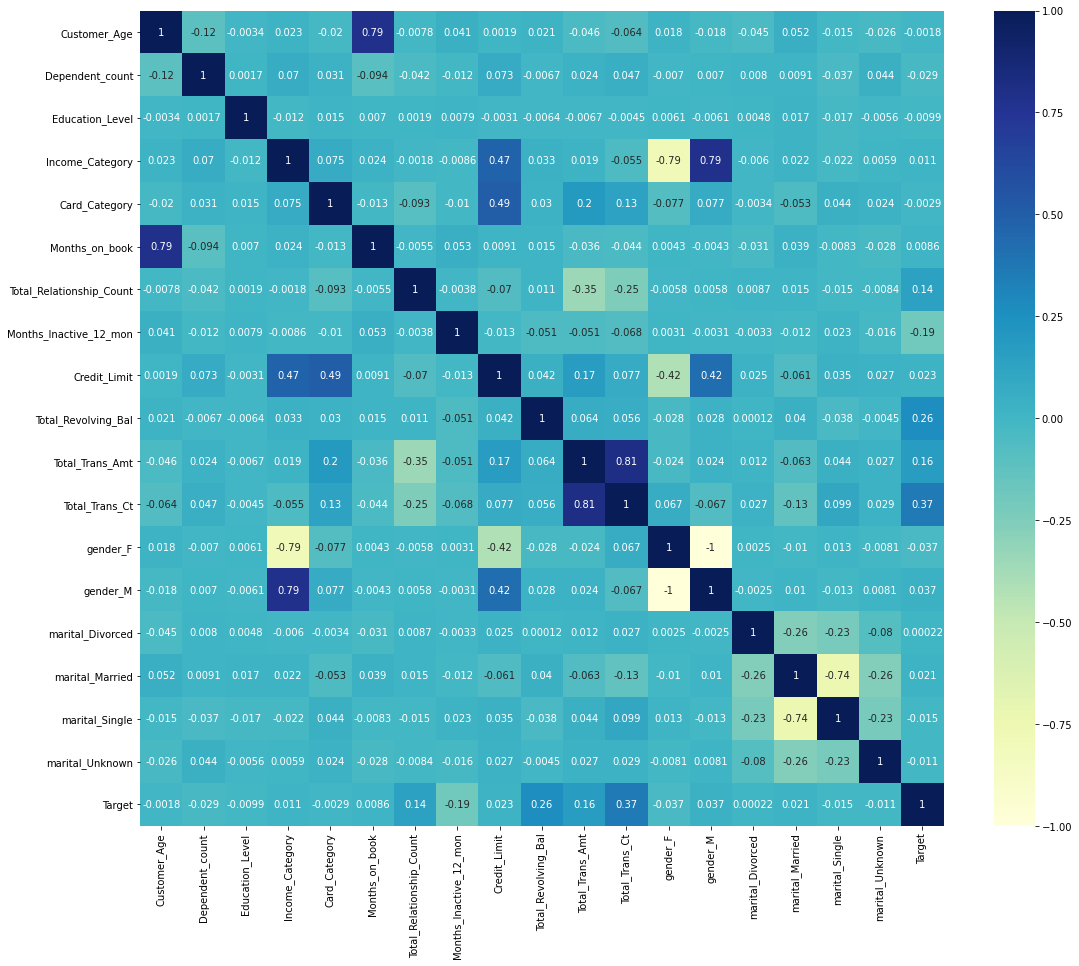

In [7]:
plt.figure(figsize=(18, 15))
sns.heatmap(bank.corr(), cmap='YlGnBu', annot=True);

Across the Correlation Matrix, the variables that better explain our target are:

- Total_Trans_Ct
- Total_Trans_Amt 
- Total_Revolving_Bal
- Total_Relationship_Count
- Months_Inactive_12_mon

However, is important to choose features that are independent among them. Looking the matrix we can see that Total_Trans_Amt and Total_Trans_Ct has 81% of correlation, that's a lot, so, I'll choose only one of them, in this case is better to select Total_Trans_Ct because it represents better information with target (37% of correlation).

The other ones are independent, so, my selection is:

- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Relationship_Count
- Months_Inactive_12_mon

### Authomatic Selection
I'll compare my selection with an authomatic way to analyze the feature selection:

In [8]:
X = bank.drop('Target', axis=1)
y = bank['Target']

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4) # selecting 4 features
selector.fit(X, y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001178DE58280>)

In [10]:
scores = selector.scores_ # how much information brings each feature

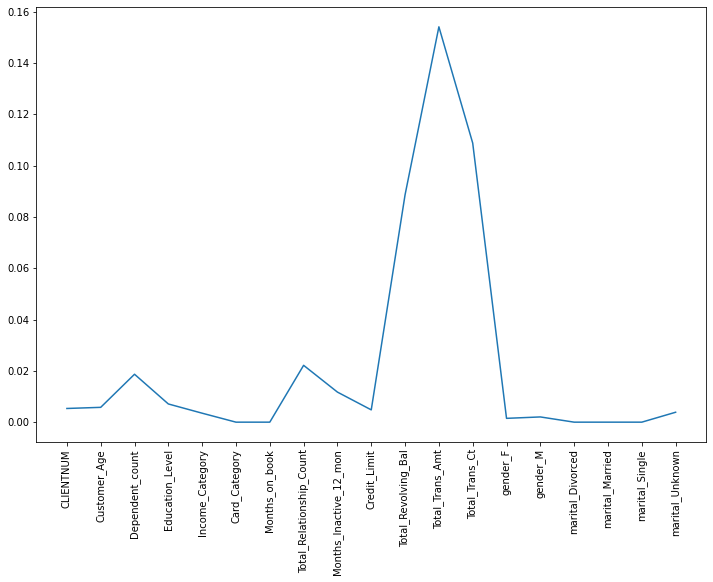

In [11]:
# visualizing:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(scores)
plt.xticks(np.arange(19), list(X.columns), rotation=90);

The results are very similar to our selection!

# Saving

In [12]:
cols = ['Total_Trans_Ct', 
        'Total_Revolving_Bal', 
        'Total_Relationship_Count', 
        'Months_Inactive_12_mon']

In [13]:
df_selection = pd.concat([X[cols], pd.DataFrame(y)], axis=1)
df_selection.head(3)

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Target
0,42,777,5,1,1
1,33,864,6,1,1
2,20,0,4,1,1


In [14]:
df_selection.to_csv(dir_in.format('data_selection.csv'), sep=',', index=False)